In [1]:
# import necessary libraries
import warnings
warnings.filterwarnings("ignore")
import nltk
from nltk.stem import WordNetLemmatizer
import json
import pickle
import matplotlib.pyplot as plt

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import SGD
import random
from keras.models import load_model

# Buat Objek WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# import file dataset untuk pre-processing

words=[]
classes = []
documents = []
ignore_words = ['?', '!']
data_file = open("Dataset_PA.json").read()
intents = json.loads(data_file)

In [2]:
# preprocessing json data
# tokenization
#nltk.download('punkt')
#nltk.download('wordnet')
for intent in intents['intents']:
    for pattern in intent['patterns']:

        #tokenize each word
        w = nltk.word_tokenize(pattern)
        words.extend(w)
        #tambah documents
        documents.append((w, intent['tag']))

        # tambah ke daftar class
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

In [3]:

words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))

# pengurutan classes
classes = sorted(list(set(classes)))

# documents = kombinasi antara patterns dan intents 
print (len(documents), "documents")

# classes = intents
print (len(classes), "classes", classes)

# words = semua kata / vocabulary
print (len(words), "unique lemmatized words", words)

# membuat file pickle untuk menyimpan objek python yang akan digunakan ketika memprediksi
pickle.dump(words,open('texts.pkl','wb')) 
pickle.dump(classes,open('label.pkl','wb'))

3124 documents
137 classes ['Njajanbot', 'Sayur_lauk', 'daging', 'daging_ayam', 'daging_ayam_basah', 'daging_ayam_berkuah', 'daging_ayam_kering', 'daging_ayam_manis', 'daging_ayam_manis_basah', 'daging_ayam_manis_berkuah', 'daging_ayam_manis_kering', 'daging_ayam_pedas', 'daging_ayam_pedas_basah', 'daging_ayam_pedas_berkuah', 'daging_ayam_pedas_kering', 'daging_kambing', 'daging_kambing_basah', 'daging_kambing_basah_manis', 'daging_kambing_basah_pedas', 'daging_kambing_berkuah', 'daging_kambing_berkuah_manis', 'daging_kambing_berkuah_pedas', 'daging_kambing_kering', 'daging_kambing_kering_manis', 'daging_kambing_kering_pedas', 'daging_kambing_manis', 'daging_kambing_pedas', 'daging_sapi', 'daging_sapi_basah', 'daging_sapi_berkuah', 'daging_sapi_kering', 'daging_sapi_manis', 'daging_sapi_manis_basah', 'daging_sapi_manis_berkuah', 'daging_sapi_manis_kering', 'daging_sapi_pedas', 'daging_sapi_pedas_basah', 'daging_sapi_pedas_berkuah', 'daging_sapi_pedas_kering', 'goodbye', 'greeting', 'ja

In [4]:
# buat list kosong untuk training data
training = []

# buat array kosong untuk outputnya
output_empty = [0] * len(classes)

# training set, bag of words untuk tiap kalimat
for doc in documents:
    # inisialisasi bag of words
    bag = []
    # daftar kata - kata yang di tokenisasi untuk pattern
    pattern_words = doc[0]
   
    # lemmatize setiap kata -> lalu buat kata dasarnya, dg tujuan untuk mewakili kata" yang berkaitan
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    
    # buat array bag of words dg label 1, jika sebuah kata cocok dan ditemukan pada pattern
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)
    # output is a '0' for each tag and '1' for current tag (for each pattern)
    # output dg label '0' untuk setiap tag dan label '1' untuk tag saat ini (untuk setiap pattern)
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1
    training.append([bag, output_row])

# acak featurenya and ubah menjadi numpy arrays
random.shuffle(training)
training = np.array(training)

# buat list train dan test
train_x = list(training[:,0])
train_y = list(training[:,1])

print("Training data telah dibuat!")

Training data telah dibuat!


In [5]:
# Buat Neural Network model untuk memprediksi respon
model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),), activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation='softmax'))

# Lalu compile model. Stochastic gradient descent dengan Nesterov accelerated gradient dapat memberikan hasil yang baik untuk model ini
sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# fitting and simpan model dg nama model.h5
hist = model.fit(np.array(train_x), np.array(train_y), epochs=400, batch_size=5, verbose=1)
model.save('model.h5', hist) # we will pickle this model to use in the future
print("\n")
print("*"*50)
print("\nModel Berhasil Dibuat!")

Epoch 1/400
625/625 [==============================] - 2s 2ms/step - loss: 3.2995 - accuracy: 0.2522
Epoch 2/400
625/625 [==============================] - 1s 2ms/step - loss: 1.7808 - accuracy: 0.5423
Epoch 3/400
625/625 [==============================] - 1s 1ms/step - loss: 1.1246 - accuracy: 0.7074
Epoch 4/400
625/625 [==============================] - 1s 2ms/step - loss: 0.8069 - accuracy: 0.7871
Epoch 5/400
625/625 [==============================] - 1s 2ms/step - loss: 0.6732 - accuracy: 0.8191
Epoch 6/400
625/625 [==============================] - 1s 2ms/step - loss: 0.5340 - accuracy: 0.8668
Epoch 7/400
625/625 [==============================] - 1s 2ms/step - loss: 0.4685 - accuracy: 0.8800
Epoch 8/400
625/625 [==============================] - 1s 1ms/step - loss: 0.4028 - accuracy: 0.8963
Epoch 9/400
625/625 [==============================] - 1s 2ms/step - loss: 0.3727 - accuracy: 0.8992
Epoch 10/400
625/625 [==============================] - 1s 1ms/step - loss: 0.3670 - accura

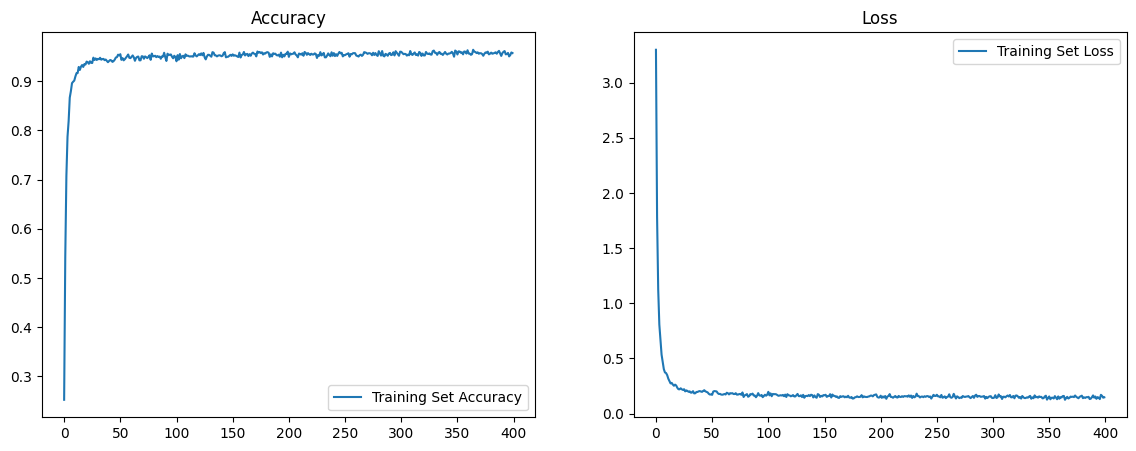

In [6]:
# Plotting model Accuracy and Loss (Visualisasi Plot Hasil Akurasi dan Loss)
# Plot Akurasi
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'],label='Training Set Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'],label='Training Set Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()